In [1]:
import boto3
session = boto3.Session(profile_name='esip')
# Any clients created from this session will use credentials
# from the [dev] section of ~/.aws/credentials.
dev_s3_client = session.client('s3')


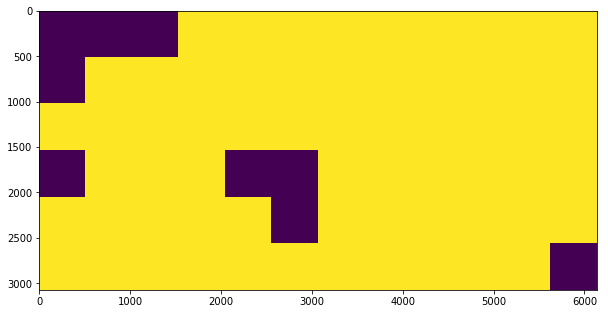

In [6]:
%matplotlib inline
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt

# Load the DEM and read out a np array of the elevation values (meters):
dem = rio.open(r'/home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/preds/20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.tif')
elev = dem.read(1)



# Plot this elevation band:
plt.figure(figsize=(10,10))
plt.imshow(elev)

title_text = ''
plt.title(title_text);


In [12]:

elev = dem.read(1)
print(elev.shape)

(3073, 6144)


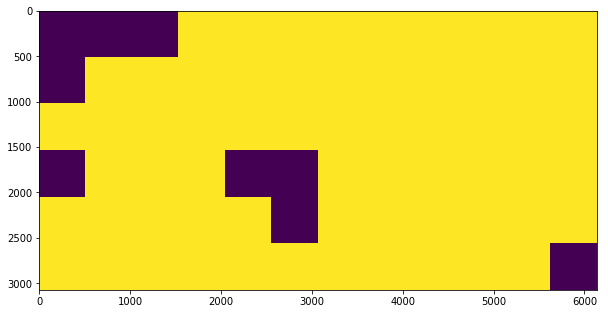

In [13]:
%matplotlib inline
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt

# Load the DEM and read out a np array of the elevation values (meters):
dem = rio.open(r'/home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif')
masksnow = dem.read(1)



# Plot this elevation band:
plt.figure(figsize=(10,10))
plt.imshow(masksnow)

title_text = ''
plt.title(title_text);

In [15]:
def compute_metrics(true, pred):
    print(true.shape, pred.shape)
    assert true.shape == pred.shape, "Masks and predictions are different shapes. Are you sure they're in the same CRS/extent?"

    compare = (true, pred)

    balanced_acc = metrics.balanced_accuracy_score(*compare)
    prfs = metrics.precision_recall_fscore_support(*compare, average='binary')

    these_metrics = {
        "balanced_accuracy" : balanced_acc,
        "precision": prfs[0],
        "recall": prfs[1],
        "f_score": prfs[2]
    }

    return these_metrics

In [17]:
mask_data = masksnow.flatten()
pred_data = elev.flatten()
    # remove nodata

In [28]:
len(mask_data[np.where(mask_data != 9999)])

2360320

In [19]:
try:
        mask_data = mask_data[np.where(mask_data != 9999)]
        pred_data = pred_data[np.where(pred_data != 9999)]
except Exception as e:
        print("Error filtering nodata. Do input data files have nodata attribute set? [{}]".format(e))

In [21]:
from sklearn import metrics
metrics = compute_metrics(mask_data, pred_data)

(2360320,) (2360320,)


In [22]:
print(metrics)

{'balanced_accuracy': 0.5935114876374716, 'precision': 0.286921030702358, 'recall': 0.9875438188505035, 'f_score': 0.44465265631726114}


In [14]:
print(masksnow.shape)

(3073, 6144)


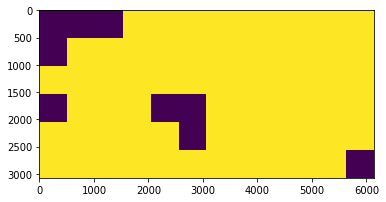

In [29]:
from rasterio.plot import show
show(masksnow)

In [5]:
!gdalinfo /home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif

Driver: GTiff/GeoTIFF
Files: /home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif
Size is 6144, 3073
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-119.630126953125000,38.229550455326141)
Pixel Size = (0.000021457672119,-0.000016856813467)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-119.6301270,  38.2295505) (119d37'48.46"W, 38d13'46.38"N)
Lower Left  (-119.6301270,  38.1777495) (119d37'48.46"W, 38d10'39.90"N)
Upper Right (-119.4982910,  38.2295505) (119d29'53.85"W, 38d13'46.38"N)
Lower Right (-119.4982910,  38.177